# Proyecto Inteligencia Computacional 

In [1]:
import pandas as pd 
import numpy as np
import pyarrow.parquet as pq
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

feats = pd.read_parquet('./data/features.parquet') 
lcs = pd.read_parquet('./data/lcs.parquet') 
oids = pd.read_parquet('./data/oids.parquet')

In [2]:
# DataFrame con todas las features de cada objeto + la clase a la que pertenecen
df_feats_class = pd.merge(oids, feats, how="inner", on="oid", sort=True)

## Manejo de los Datos

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
# DataFrame con todas las features de cada objeto + la clase a la que pertenecen
df_feats_class = pd.merge(oids, feats, how="inner", on="oid", sort=True)
df_feats_for_forest = df_feats_class[df_feats_class.columns[1:]]
arr_class = df_feats_for_forest[df_feats_for_forest.columns[0]].values
df_feats_class

,oid,alerceclass,Q31_r,Rcs_r,Skew_r,SmallKurtosis_r,Std_r,StetsonK_r,Pvar_r,ExcessVar_r,...,max_diffmaglim_after_fid_g,median_diffmaglim_after_fid_g,delta_mag_fid_r,delta_mjd_fid_r,first_mag_r,mean_mag_r,min_mag_r,n_det_r,PercentAmplitude_r,Harmonics_mag_5_r
0,ZTF17aaaaafz,LPV,1.464396,0.215017,-0.173195,-0.741959,0.976239,0.900859,1.0,0.002542,...,20.823200,19.508801,4.200617,1339.718634,17.564814,18.677803,16.661703,628.0,0.112910,0.270302
1,ZTF17aaaaajg,RRL,0.366083,0.104706,0.405444,-1.552645,0.192603,0.883649,1.0,0.000132,...,21.066299,20.175400,0.580561,1251.693287,16.485819,16.641393,16.403305,320.0,0.027691,0.009083
2,ZTF17aaaaavq,LPV,2.839326,0.314243,0.001261,-1.538020,1.494441,0.800329,1.0,0.009013,...,21.126600,20.008301,5.057098,1434.977350,16.880259,15.694755,13.155277,656.0,0.180732,0.105483
3,ZTF17aaaacth,EB,0.029942,0.087856,2.875995,8.698949,0.476514,0.543303,1.0,0.000773,...,20.865801,19.922400,2.519390,1189.854849,16.813747,17.039993,16.799618,93.0,0.145533,0.028314
4,ZTF17aaaadmx,LPV,1.512813,0.298351,-0.484697,-0.732266,1.037921,0.791008,1.0,0.004826,...,20.916500,19.762699,5.000990,1338.672627,13.901798,14.856612,12.674696,479.0,0.172507,0.097117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,ZTF21abblixa,CEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.019199,19.309700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8415,ZTF21abbvvji,RRL,0.389800,0.259549,0.506888,-1.274300,0.202627,0.925235,1.0,0.000000,...,20.693900,20.560050,0.483679,28.936458,16.840920,17.002280,16.805649,8.0,0.024969,3.964182
8416,ZTF21abbzxoh,DSCT,0.457832,0.359654,0.324823,-1.448713,0.219106,0.893713,1.0,0.000203,...,20.815800,20.049101,0.595043,353.070185,15.650616,15.353477,15.068784,24.0,0.024223,2.072808
8417,ZTF21abcgftb,RRL,0.347692,0.136953,0.130523,-0.614194,0.192589,0.830999,1.0,0.000217,...,20.883900,20.081400,0.794328,375.932407,13.234352,13.045922,12.675948,24.0,0.034678,0.022427


In [5]:
# Suponiendo que 'feats' es tu DataFrame y 'target' es la columna de etiquetas
X_forest = df_feats_for_forest.drop(columns=['alerceclass'])  # Reemplaza 'target' con el nombre de tu columna de etiquetas
y_forest = df_feats_for_forest['alerceclass']  # Reemplaza 'target' con el nombre de tu columna de etiquetas

# Entrenar el modelo RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, 
                            criterion="gini",
                            max_features="sqrt",
                            bootstrap=True,
                            max_samples=2/3,
                            oob_score=True,
                            random_state=42
                            ,class_weight="balanced")
clf.fit(X_forest, y_forest)

# Obtener la importancia de las características
feature_importances = clf.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({
    'Feature': X_forest.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
115,Multiband_period_g_r,0.077157
117,Period_band_g,0.061812
119,Period_band_r,0.056347
48,g-r_mean_g_r,0.033195
49,g-r_max_corr_g_r,0.031238
...,...,...
27,SPM_tau_rise_r,0.000592
56,MHPS_PN_flag_g,0.000365
76,Pvar_g,0.000180
6,Pvar_r,0.000152


In [6]:
# Obtener la importancia de las características
feature_importances = clf.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
importance = pd.DataFrame({
    'Feature': X_forest.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
importance = importance.sort_values(by='Importance', ascending=False)

# Calcular la suma acumulada de importancia
importance['Cumulative Importance'] = importance['Importance'].cumsum()

# Encontrar la posición donde la suma acumulada alcanza
threshold_position = (importance['Cumulative Importance'] <= 0.7).sum()

# Mostrar la tabla y la posición
print(importance)
print(f"La suma acumulada alcanza el 70% en la posición: {threshold_position}")

                  Feature  Importance  Cumulative Importance
115  Multiband_period_g_r    0.077157               0.077157
117         Period_band_g    0.061812               0.138969
119         Period_band_r    0.056347               0.195316
48           g-r_mean_g_r    0.033195               0.228511
49       g-r_max_corr_g_r    0.031238               0.259749
..                    ...         ...                    ...
27         SPM_tau_rise_r    0.000592               0.999187
56         MHPS_PN_flag_g    0.000365               0.999552
76                 Pvar_g    0.000180               0.999732
6                  Pvar_r    0.000152               0.999884
61         MHPS_PN_flag_r    0.000116               1.000000

[178 rows x 3 columns]
La suma acumulada alcanza el 70% en la posición: 41


In [7]:
importance_df_ = importance_df[importance_df.columns[:-1]].head(41)
importance_arr = importance_df_["Feature"].values

df_feats_for_auto = df_feats_for_forest[importance_arr]
df_feats_for_auto.insert(0, "alerceclass", df_feats_for_forest['alerceclass'].values)
df_feats_for_auto

,alerceclass,Multiband_period_g_r,Period_band_g,Period_band_r,g-r_mean_g_r,g-r_max_corr_g_r,g-W2,g-r_mean_corr_g_r,GP_DRW_tau_g,g-r_max_g_r,...,Harmonics_mse_r,PPE_g_r,MHPS_high_r,n_det_r,Rcs_g,Harmonics_phase_2_r,Amplitude_g,n_non_det_after_fid_r,n_pos_r,Harmonics_mag_1_g
0,LPV,0.998056,0.999001,0.998056,1.435857,1.250542,9.565536,1.535733,41.886814,1.060522,...,1.393346e+00,0.077231,0.401432,628.0,0.322965,3.732083,1.658191,103.0,77.0,1.153712
1,RRL,0.374650,0.374650,0.374650,-0.031629,0.082634,1.225796,0.098403,0.235621,-0.144400,...,1.786851e-03,0.283896,0.041821,320.0,0.091017,6.112401,0.296102,345.0,186.0,0.213296
2,LPV,275.362316,275.362316,275.362316,2.523045,2.055053,11.888458,2.705704,445.876352,1.993020,...,5.574697e-02,0.234644,0.024606,656.0,0.302653,2.284082,3.060980,72.0,354.0,2.630470
3,EB,0.109562,0.109562,0.842423,-0.251640,0.406408,2.677564,1.086571,0.113667,0.262726,...,2.318358e-01,0.002171,0.177849,93.0,0.194645,6.109989,1.822644,79.0,78.0,0.901878
4,LPV,0.498661,0.498661,0.498661,3.434069,3.137792,14.166490,3.518878,952.389572,2.788825,...,8.482677e-01,0.031869,0.019865,479.0,0.185545,2.529972,1.836337,166.0,87.0,1.047247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,CEP,11.564211,11.564211,NaN,NaN,NaN,NaN,NaN,1.027615,NaN,...,NaN,0.112471,NaN,NaN,0.215244,NaN,0.492208,NaN,NaN,1639.935937
8415,RRL,0.299751,0.299751,0.427716,-0.264118,-0.060133,0.748859,0.022580,0.065763,-0.449000,...,0.000000e+00,0.058390,0.155205,8.0,0.372428,1.467675,0.349772,9.0,5.0,3.988648
8416,DSCT,0.063881,0.073249,0.079062,0.493911,0.090625,1.412304,0.419827,0.114303,-0.179602,...,3.208568e-03,0.042902,0.061557,24.0,0.186773,5.959990,0.439176,32.0,16.0,0.296721
8417,RRL,0.357062,0.357062,0.357062,-0.127374,0.159251,1.051033,0.070111,0.356889,0.545899,...,3.319771e-03,0.103129,0.052782,24.0,0.143484,6.122477,0.269553,57.0,12.0,0.269048


In [8]:
df_feats_for_auto['oid'] = df_feats_class['oid']
df_feats_for_auto_no_oid = df_feats_for_auto.drop(columns=['oid'])

C:\Users\nicos\AppData\Local\Temp\ipykernel_53856\3508390410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feats_for_auto['oid'] = df_feats_class['oid']


In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, shuffle

#Primero definimos un conjunto test balanceado con 60 elementos de cada clase
df_test = df_feats_for_auto.groupby('alerceclass').apply(lambda x: x.sample(n=50, random_state=42)).reset_index(drop=True)
df_test_no_oid = df_test.drop(columns=['oid'])
X_test = df_test_no_oid.drop(columns=['alerceclass'])
y_test = df_test_no_oid['alerceclass']

# Eliminar los elementos de df_test de df_feats_for_auto
df_auto = pd.concat([df_feats_for_auto,df_test]).drop_duplicates(keep=False)

df_val = df_auto.groupby('alerceclass').apply(lambda x: x.sample(n=80, random_state=42)).reset_index(drop=True)
df_val_no_oid = df_val.drop(columns=['oid'])
X_val = df_val_no_oid.drop(columns=['alerceclass'])
y_val = df_val_no_oid['alerceclass']

df_train = pd.concat([df_auto,df_val]).drop_duplicates(keep=False)
df_train_no_oid = df_train.drop(columns=['oid'])
X_train = df_train_no_oid.drop(columns=['alerceclass'])
y_train = df_train_no_oid['alerceclass']


#Imputar los NaN por el valor más frecuente en el conjunto de entrenamiento
imputer = SimpleImputer(strategy='most_frequent')
imputed_X_train = imputer.fit_transform(X_train)
imputed_X_val = imputer.transform(X_val)
imputed_X_test = imputer.transform(X_test)

# Normalizar los datos usando las constantes del conjunto de entrenamiento
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(imputed_X_train)
X_val = scaler.transform(imputed_X_val)
X_test = scaler.transform(imputed_X_test)

#Función para realizar upsampling
def upsample_data(X, y):
    df = pd.concat([pd.DataFrame(X), y.reset_index(drop=True)], axis=1)
    class_counts = y.value_counts()
    max_class_count = class_counts.max()
    
    df_upsampled = pd.DataFrame()
    for class_label in class_counts.index:
        df_class = df[df['alerceclass'] == class_label]
        df_class_upsampled = resample(df_class, 
                                      replace=True,  # Muestreo con reemplazo
                                      n_samples=max_class_count,  # Número de muestras igual a la clase mayoritaria
                                      random_state=42)
        df_upsampled = pd.concat([df_upsampled, df_class_upsampled], axis=0)
    
    df_upsampled = shuffle(df_upsampled, random_state=42)
    return df_upsampled.drop(columns=['alerceclass']).values, df_upsampled['alerceclass']

# Realizar upsampling en el conjunto de entrenamiento
X_train, y_train = upsample_data(scaled_X_train, y_train)


# Mostrar los resultados
print("Distribución de clases en el conjunto de entrenamiento:")
print(y_train.value_counts())
print("\nDistribución de clases en el conjunto de validación:")
print(y_val.value_counts())
print("\nDistribución de clases en el conjunto de prueba:")
print(y_test.value_counts())

Distribución de clases en el conjunto de entrenamiento:
alerceclass
RRL     2559
DSCT    2559
EB      2559
CEP     2559
LPV     2559
Name: count, dtype: int64

Distribución de clases en el conjunto de validación:
alerceclass
CEP     80
DSCT    80
EB      80
LPV     80
RRL     80
Name: count, dtype: int64

Distribución de clases en el conjunto de prueba:
alerceclass
CEP     50
DSCT    50
EB      50
LPV     50
RRL     50
Name: count, dtype: int64


C:\Users\nicos\AppData\Local\Temp\ipykernel_53856\2428626423.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_test = df_feats_for_auto.groupby('alerceclass').apply(lambda x: x.sample(n=50, random_state=42)).reset_index(drop=True)
C:\Users\nicos\AppData\Local\Temp\ipykernel_53856\2428626423.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_val = df_auto.groupby('alerceclass').apply(lambda x: x.sa

# GMM

In [10]:
from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense
from keras.optimizers import SGD
from keras.optimizers import Adam , Nadam
from keras.optimizers import RMSprop
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from torch import nn
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)


# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
y_val_tensor = torch.tensor(y_val_encoded, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

# Create DataLoader for training and validation sets
train_dataset_autoencoder = TensorDataset(X_train_tensor, X_train_tensor)
val_dataset_autoencoder = TensorDataset(X_val_tensor, X_val_tensor)
test_dataset_autoencoder = TensorDataset(X_test_tensor, X_test_tensor)


class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 60),  
            nn.SELU(),          
            nn.Linear(60, 55),
            nn.SELU(),
            nn.Linear(55, 50),
            nn.SELU(),
            nn.Linear(50, 45),         
            nn.SELU(),
            nn.Linear(45, 40),         
            nn.SELU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(40, 45), ##
            nn.SELU(),
            nn.Linear(45, 50),  ##
            nn.SELU(),
            nn.Linear(50, 55),  ##
            nn.SELU(),
            nn.Linear(55, 60),  ##
            nn.SELU(),
            nn.Linear(60, input_dim)  ##
        )  

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def get_latent_representation(self, x):
        """Returns the latent representation (encoded space)."""
        with torch.no_grad():
            return self.encoder(x)

In [11]:
lr = 0.0001
batch_size = 64
#criterion = nn.MSELoss()
criterion = nn.L1Loss()  # Mean Absolute Error
early_stopping_tolerance = 10
epochs = 100

curves_autoencoder = {
    "train_loss": [],
    "val_loss": []
}

input_dim = X_train_tensor.shape[1]
autoencoder = Autoencoder(input_dim)

optimizer = optim.Adam(autoencoder.parameters(), lr=lr, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5) # Reduce the learning rate by half every 20 epochs

for epoch in range(epochs):
    autoencoder.train()
    running_loss_train = 0.0
    for inputs, _ in DataLoader(train_dataset_autoencoder, batch_size=batch_size, shuffle=True):
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss_train = criterion(outputs, inputs)
        loss_train.backward()
        optimizer.step()
        running_loss_train += loss_train.item() * inputs.size(0)
    epoch_loss_train = running_loss_train / len(train_dataset_autoencoder)
    curves_autoencoder["train_loss"].append(epoch_loss_train)
    print(f"Epoch {epoch + 1}/{epochs} - Train Loss: {epoch_loss_train}")

    #validamos modelo
    autoencoder.eval()
    running_loss_val = 0.0
    with torch.no_grad():
        for inputs, _ in DataLoader(val_dataset_autoencoder, batch_size=batch_size, shuffle=False):
            outputs = autoencoder(inputs)
            loss_val = criterion(outputs, inputs)
            running_loss_val += loss_val.item() * inputs.size(0)
        epoch_loss_val = running_loss_val / len(val_dataset_autoencoder)
        curves_autoencoder["val_loss"].append(epoch_loss_val)
        print(f"Epoch {epoch + 1}/{epochs} - Val Loss: {epoch_loss_val}")

Epoch 1/100 - Train Loss: 0.5151014825034393
Epoch 1/100 - Val Loss: 0.44360892415046693
Epoch 2/100 - Train Loss: 0.41410469096030234
Epoch 2/100 - Val Loss: 0.38584346175193784
Epoch 3/100 - Train Loss: 0.37792102300175096
Epoch 3/100 - Val Loss: 0.36105908155441285
Epoch 4/100 - Train Loss: 0.3595331240091626
Epoch 4/100 - Val Loss: 0.3454208409786224
Epoch 5/100 - Train Loss: 0.34469671577809147
Epoch 5/100 - Val Loss: 0.32709566950798036
Epoch 6/100 - Train Loss: 0.32528462462613433
Epoch 6/100 - Val Loss: 0.30446644306182863
Epoch 7/100 - Train Loss: 0.3054385596907386
Epoch 7/100 - Val Loss: 0.28877271473407745
Epoch 8/100 - Train Loss: 0.29077893954182377
Epoch 8/100 - Val Loss: 0.27732751965522767
Epoch 9/100 - Train Loss: 0.2793402965132172
Epoch 9/100 - Val Loss: 0.2675098592042923
Epoch 10/100 - Train Loss: 0.2691659076552039
Epoch 10/100 - Val Loss: 0.25871272921562194
Epoch 11/100 - Train Loss: 0.2611719545266646
Epoch 11/100 - Val Loss: 0.2526162576675415
Epoch 12/100 - 

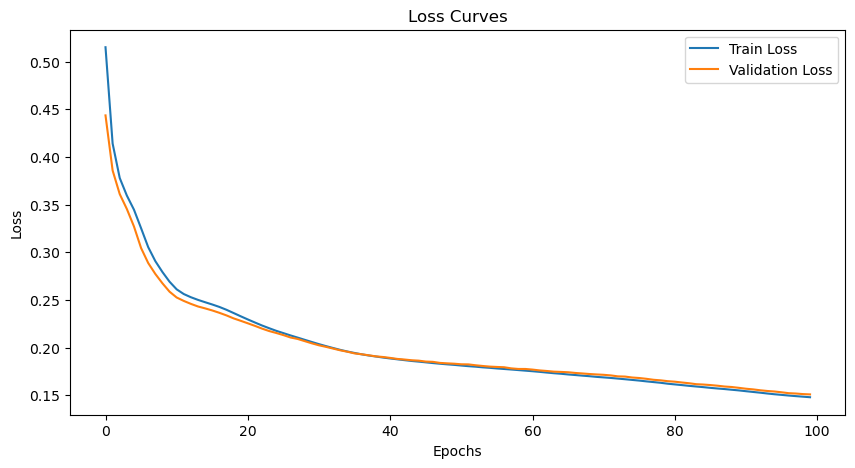

In [12]:
# Plotear las curvas de pérdida
plt.figure(figsize=(10, 5))
plt.plot(curves_autoencoder["train_loss"], label='Train Loss')
plt.plot(curves_autoencoder["val_loss"], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

In [13]:
# Pasar los datos de prueba por el encoder para obtener las representaciones latentes
test_loader = DataLoader(test_dataset_autoencoder, batch_size=batch_size, shuffle=False)
latent_representations = []

autoencoder.eval()  # Cambiar a modo evaluación
with torch.no_grad():
    for inputs, _ in test_loader:
        latents = autoencoder.get_latent_representation(inputs)
        latent_representations.append(latents)

# Combinar todas las representaciones latentes en un solo tensor
latent_representations = torch.cat(latent_representations).numpy()

In [14]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Aplicar GMM
n_clusters = len(np.unique(y_test_encoded))  # Número de clases reales
#gmm = GaussianMixture(n_components=5, random_state=42, init_params='kmeans')
gmm = GaussianMixture(n_components=5, n_init=5, covariance_type='diag', random_state=42)
gmm_labels = gmm.fit_predict(latent_representations)

# Evaluar Clustering
ari = adjusted_rand_score(y_test_encoded, gmm_labels)
silhouette = silhouette_score(latent_representations, gmm_labels)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")


Adjusted Rand Index (ARI): 0.1451
Silhouette Score: 0.2061


c:\Users\nicos\.conda\envs\env_inteligencia\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicos\.conda\envs\env_inteligencia\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicos\.conda\envs\env_inteligencia\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicos\.conda\envs\env_inteligencia\Lib\site-packages\sklearn\cluster\_

In [15]:
# Obtener nombres de las clases originales usando LabelEncoder
class_names = label_encoder.inverse_transform(np.unique(y_test_encoded))
# Crear un diccionario que mapea clusters a nombres de clases
cluster_to_class = {cluster: class_name for cluster, class_name in zip(np.unique(gmm_labels), class_names)}

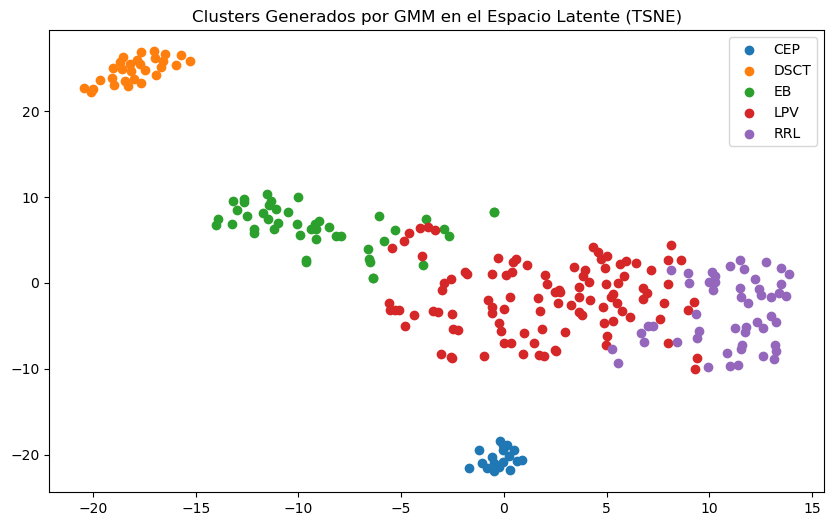

In [16]:
from sklearn.manifold import TSNE

# Reducir a 2 dimensiones con t-SNE
tsne = TSNE(n_components=2, random_state=42)
latent_2d = tsne.fit_transform(latent_representations)

plt.figure(figsize=(10, 6))
for cluster in np.unique(gmm_labels):
    cluster_points = latent_2d[gmm_labels == cluster]
    class_name = cluster_to_class[cluster]  # Nombre de la clase
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"{class_name}")  # Usa el nombre
plt.legend()
plt.title("Clusters Generados por GMM en el Espacio Latente (TSNE)")
plt.show()

c:\Users\nicos\.conda\envs\env_inteligencia\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\nicos\.conda\envs\env_inteligencia\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


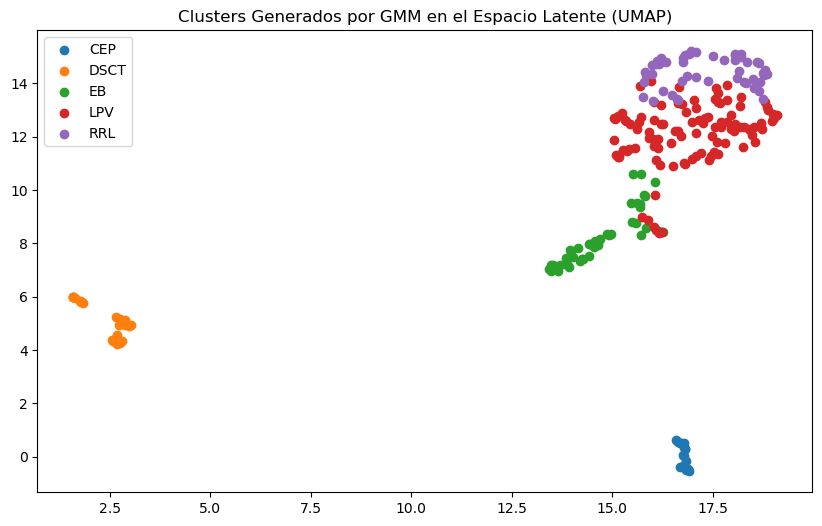

In [17]:
import umap
import matplotlib.pyplot as plt
import numpy as np

# Reducir a 2 dimensiones con UMAP
umap_reducer = umap.UMAP(n_components=2, n_neighbors=10, random_state=42)
latent_2d_umap = umap_reducer.fit_transform(latent_representations)

plt.figure(figsize=(10, 6))
for cluster in np.unique(gmm_labels):
    cluster_points = latent_2d_umap[gmm_labels == cluster]
    class_name = cluster_to_class[cluster]  
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"{class_name}")  # Usa el nombre
plt.legend()
plt.title("Clusters Generados por GMM en el Espacio Latente (UMAP)")
plt.show()

Número de anomalías detectadas: 6
Número de puntos normales: 244


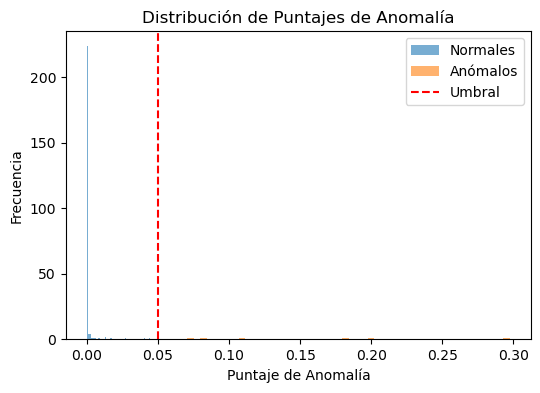

In [20]:
# Obtener las probabilidades de pertenencia a cada cluster
probs = gmm.predict_proba(latent_representations)

# Calcular los puntajes de anomalía
anomaly_scores_gmm = 1 - probs.max(axis=1)

# Definir un umbral para clasificar anomalías
threshold = 0.05  # Ajusta este valor según la distribución de tus datos

# Clasificar como anómalos (True para anomalías, False para normales)
anomaly_predictions_gmm = anomaly_scores_gmm > threshold

# Mostrar resultados
print("Número de anomalías detectadas:", np.sum(anomaly_predictions_gmm))
print("Número de puntos normales:", len(anomaly_scores_gmm) - np.sum(anomaly_predictions_gmm))

# Graficar histogramas de puntajes de anomalía
plt.figure(figsize=(6, 4))
plt.hist(anomaly_scores_gmm[~anomaly_predictions_gmm], bins=50, alpha=0.6, label="Normales")
plt.hist(anomaly_scores_gmm[anomaly_predictions_gmm], bins=50, alpha=0.6, label="Anómalos")
plt.axvline(threshold, color='red', linestyle='dashed', label="Umbral")
plt.xlabel("Puntaje de Anomalía")
plt.ylabel("Frecuencia")
plt.legend()
plt.title("Distribución de Puntajes de Anomalía")
plt.show()

In [21]:
# Crear un DataFrame con los datos de prueba, los puntajes y las predicciones
df_test_gmm = pd.DataFrame({
    'oid': df_test['oid'],  # Sustituye con la columna que contiene los IDs únicos de tus objetos 
    'anomaly_score': anomaly_scores_gmm,
    'is_anomaly': anomaly_predictions_gmm,
    'class': y_test
})

# Filtrar solo las anomalías
anomalies_gmm = df_test_gmm[df_test_gmm['is_anomaly'] == True]

# Seleccionar las 5 anomalías con mayor puntaje
top_5_anomalies_gmm = anomalies_gmm.nlargest(5, 'anomaly_score')
print("Top 5 anomalías:")
print(top_5_anomalies_gmm)

Top 5 anomalías:
              oid  anomaly_score  is_anomaly class
83   ZTF18aaxirfa       0.297541        True  DSCT
103  ZTF18aaadswu       0.200989        True    EB
221  ZTF18aaprtri       0.182250        True   RRL
22   ZTF18abgvfry       0.110575        True   CEP
149  ZTF18aaaepla       0.082689        True    EB


In [22]:
# Asegúrate de que df_test contenga las IDs de los objetos y las features originales
df_test_gmm['anomaly_score'] = anomaly_scores_gmm  # Puntajes de anomalía calculados con GMM
df_test_gmm['is_anomaly'] = anomaly_predictions_gmm  # Predicciones de anomalía (True/False)

# Mostrar solo las anomalías
anomalies_gmm = df_test_gmm[df_test_gmm['is_anomaly'] == True]
print("Objetos anómalos detectados:")
anomalies_gmm

Objetos anómalos detectados:


,oid,anomaly_score,is_anomaly,class
22,ZTF18abgvfry,0.110575,True,CEP
83,ZTF18aaxirfa,0.297541,True,DSCT
103,ZTF18aaadswu,0.200989,True,EB
117,ZTF18abfktyv,0.070578,True,EB
149,ZTF18aaaepla,0.082689,True,EB
221,ZTF18aaprtri,0.182250,True,RRL


# MCDSVDD

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
import umap
import matplotlib.pyplot as plt

class MultiClassDeepSVDD(nn.Module):
    def __init__(self, input_dim, z_dim, n_classes):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 90),
            nn.LayerNorm(90),
            nn.ELU(),
            nn.Linear(90, 70),
            nn.LayerNorm(70),
            nn.ELU(),
            nn.Linear(70, 50),
            nn.LayerNorm(50),
            nn.ELU(),
            nn.Linear(50, 30),
            nn.LayerNorm(30),
            nn.ELU(),
            nn.Linear(30, z_dim)
        )
        self.c = None  # Centros inicializados en None
        self.n_classes = n_classes

    def forward(self, x):
        z = self.encoder(x)
        return z

    def set_c(self, dataloader, eps=0.01):
        latents, labels = self.get_latent_space(dataloader)
        c = []
        for i in range(self.n_classes):
            ixs = np.where(labels == i)
            c.append(torch.mean(latents[ixs], dim=0))
        c = torch.stack(c)
        for i in range(len(c)):
            c[i][(abs(c[i]) < eps) & (c[i] < 0)] = -eps
            c[i][(abs(c[i]) < eps) & (c[i] > 0)] = eps
        self.c = c.to(next(self.parameters()).device)

    def update_centers(self, dataloader):
        latents, labels = self.get_latent_space(dataloader)
        for i in range(self.n_classes):
            ixs = np.where(labels == i)
            self.c[i] = torch.mean(latents[ixs], dim=0).to(next(self.parameters()).device)

    def get_latent_space(self, dataloader):
        latents = []
        labels = []
        with torch.no_grad():
            for x, y in dataloader:
                x, y = x.to(next(self.parameters()).device), y.to(next(self.parameters()).device)
                z = self.forward(x)
                latents.append(z.detach().cpu())
                labels.append(y.detach().cpu())
        return torch.cat(latents), torch.cat(labels)

    def compute_loss(self, x, y):
        z = self.forward(x)
        loss = torch.mean(torch.sum((z - self.c[y]) ** 2, dim=1))
        return loss
    
    def compute_anomaly_score(self, z):
        """
        Calcula el puntaje de anomalía basado en la distancia al centro más cercano.
        """
        distances = torch.sum((z.unsqueeze(1) - self.c) ** 2, dim=2)  # Distancias a todos los centros
        scores = torch.min(distances, dim=1)[0]  # Escoge la distancia mínima
        return scores

    # def compute_anomaly_score(self, x):
    #     z = self.forward(x)
    #     score = torch.min(torch.sum((z.unsqueeze(1) - self.c) ** 2, dim=2), dim=1)[0]
    #     return score

    def set_anomaly_threshold(self, dataloader, percentile=95):
        """
        Determina el umbral de anomalía basado en los datos.
        """
        self.eval()
        anomaly_scores = []
        with torch.no_grad():
            for x, _ in dataloader:
                x = x.to(next(self.parameters()).device)
                z = self.encoder(x)  # Obtén el espacio latente
                scores = self.compute_anomaly_score(z)  # Puntaje de anomalía
                anomaly_scores.extend(scores.cpu().numpy())

        # Calcula el umbral como el percentil especificado
        self.anomaly_threshold = np.percentile(anomaly_scores, percentile)
        print(f"Umbral de Anomalía Establecido en: {self.anomaly_threshold}")

    def classify_anomalies(self, x):
        """
        Clasifica si las muestras son anómalas basándose en el umbral.
        """
        self.eval()
        with torch.no_grad():
            z = self.encoder(x)  # Representación latente
            scores = self.compute_anomaly_score(z)  # Puntaje de anomalía
            predictions = scores > self.anomaly_threshold  # True si es anómalo
        return predictions, scores    
    
    
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)    

#TENSORES
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
y_val_tensor = torch.tensor(y_val_encoded, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

#DATASETS
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

#DATALOADER
train_loader_mcdsvdd = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader_mcdsvdd = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader_mcdsvdd = DataLoader(test_dataset, batch_size=32, shuffle=False)


input_dim = X_train_tensor.shape[1]
z_dim = 20
n_classes = len(np.unique(y_train_encoded))

# Crear una instancia del modelo
model_mcdsvdd = MultiClassDeepSVDD(input_dim, z_dim, n_classes)
optimizer = torch.optim.Adam(model_mcdsvdd.parameters(), lr=0.001)
num_epochs = 30

# Establecer el centro c
model_mcdsvdd.set_c(train_loader_mcdsvdd)

curves={
    "train_loss": [],
    "val_loss": []
}

# Entrenar el modelo
for epoch in range(num_epochs):
    model_mcdsvdd.train()
    running_loss_train = 0.0
    running_loss_val = 0.0
    for inputs, labels in train_loader_mcdsvdd:
        inputs, labels = inputs.to(torch.device("cpu")), labels.to(torch.device("cpu"))
        optimizer.zero_grad()
        loss_train = model_mcdsvdd.compute_loss(inputs, labels)
        loss_train.backward()
        optimizer.step()
        running_loss_train += loss_train.item() * inputs.size(0)
    train_loss = running_loss_train / len(train_loader_mcdsvdd.dataset)
    curves["train_loss"].append(train_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Train loss: {train_loss:.4f}')

    # Actualizar los centros al final de la época
    model_mcdsvdd.eval()  # Cambiar a modo de evaluación para evitar afectar el entrenamiento
    if epoch % 5 == 0:  # Recalcular cada 5 épocas
        model_mcdsvdd.update_centers(train_loader_mcdsvdd)

    # Evaluar el modelo para conjunto de validación
    model_mcdsvdd.eval()
    with torch.no_grad():
        for inputs, labels in val_loader_mcdsvdd:
            inputs, labels = inputs.to(torch.device("cpu")), labels.to(torch.device("cpu"))
            loss_val = model_mcdsvdd.compute_loss(inputs, labels)
            running_loss_val += loss_val.item() * inputs.size(0)
        val_loss = running_loss_val / len(val_loader_mcdsvdd.dataset)
        curves["val_loss"].append(val_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Val loss: {val_loss:.4f}')

c:\Users\nicos\.conda\envs\env_inteligencia\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 1/30, Train loss: 0.1737
Epoch 1/30, Val loss: 0.0576
Epoch 2/30, Train loss: 0.0423
Epoch 2/30, Val loss: 0.0367
Epoch 3/30, Train loss: 0.0386
Epoch 3/30, Val loss: 0.0353
Epoch 4/30, Train loss: 0.0353
Epoch 4/30, Val loss: 0.0336
Epoch 5/30, Train loss: 0.0330
Epoch 5/30, Val loss: 0.0340
Epoch 6/30, Train loss: 0.0307
Epoch 6/30, Val loss: 0.0232
Epoch 7/30, Train loss: 0.0190
Epoch 7/30, Val loss: 0.0216
Epoch 8/30, Train loss: 0.0179
Epoch 8/30, Val loss: 0.0192
Epoch 9/30, Train loss: 0.0169
Epoch 9/30, Val loss: 0.0206
Epoch 10/30, Train loss: 0.0162
Epoch 10/30, Val loss: 0.0212
Epoch 11/30, Train loss: 0.0152
Epoch 11/30, Val loss: 0.0162
Epoch 12/30, Train loss: 0.0104
Epoch 12/30, Val loss: 0.0126
Epoch 13/30, Train loss: 0.0102
Epoch 13/30, Val loss: 0.0125
Epoch 14/30, Train loss: 0.0096
Epoch 14/30, Val loss: 0.0143
Epoch 15/30, Train loss: 0.0092
Epoch 15/30, Val loss: 0.0153
Epoch 16/30, Train loss: 0.0092
Epoch 16/30, Val loss: 0.0099
Epoch 17/30, Train loss: 0

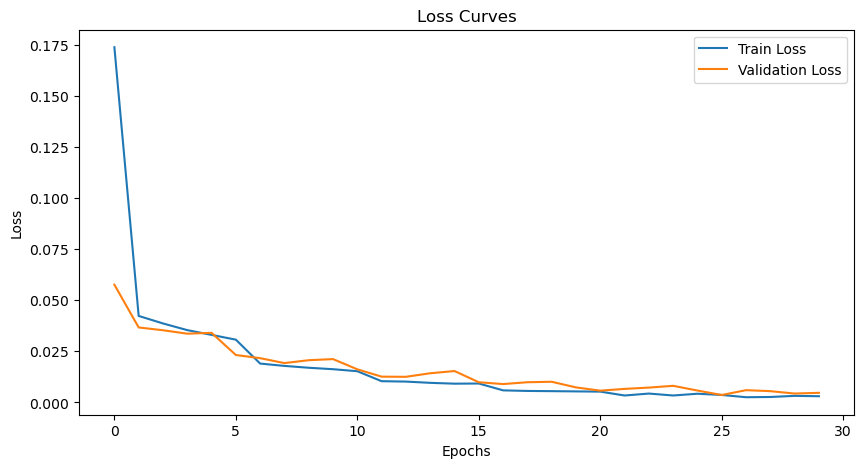

In [11]:
# Plotear las curvas de pérdida

plt.figure(figsize=(10, 5))
plt.plot(curves["train_loss"], label='Train Loss')
plt.plot(curves["val_loss"], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

In [12]:
encoder = model_mcdsvdd.encoder

embeddings_test_mcdsvdd = []
embeddings_val_mcdsvdd = []

model_mcdsvdd.eval()

model_mcdsvdd.set_c(train_loader_mcdsvdd)
with torch.no_grad():
        for inputs in X_val_tensor:
            #inputs=inputs.unsqueeze(0)
            z = encoder(inputs)
            embeddings_val_mcdsvdd.append(z.squeeze(0).cpu().numpy())

model_mcdsvdd.set_c(test_loader_mcdsvdd)
with torch.no_grad():
        for inputs in X_test_tensor:
            #inputs=inputs.unsqueeze(0)
            z = encoder(inputs)
            embeddings_test_mcdsvdd.append(z.squeeze(0).cpu().numpy())

In [13]:
# Recuperar nombres de clases originales
class_names = label_encoder.inverse_transform(np.unique(y_test_encoded))

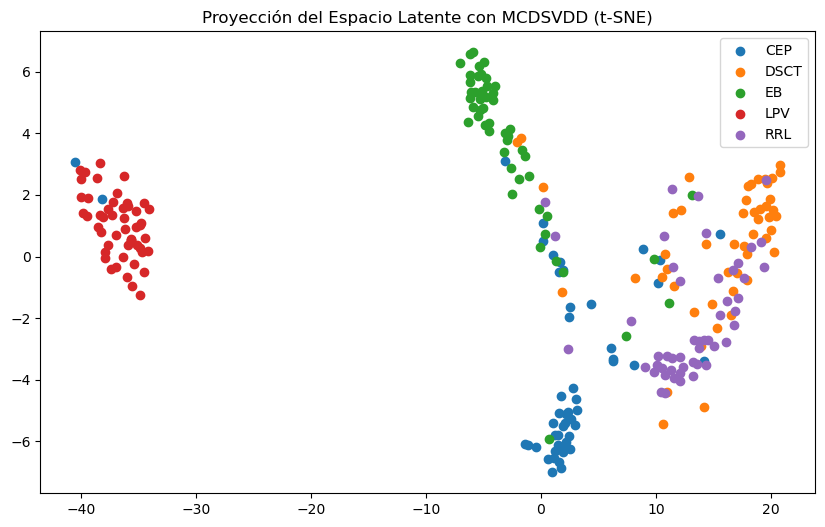

In [14]:
from sklearn.manifold import TSNE

# Obtener el espacio latente para el conjunto de prueba
latents, labels = embeddings_test_mcdsvdd, y_test_tensor

# Reducir dimensiones con t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
latent_2d = tsne.fit_transform(np.array(latents))

plt.figure(figsize=(10, 6))
for label in np.unique(labels.numpy()):
    points = latent_2d[labels.numpy() == label]
    class_name = label_encoder.inverse_transform([label])[0]  # Obtener nombre de clase
    plt.scatter(points[:, 0], points[:, 1], label=f"{class_name}")
plt.legend()
plt.title("Proyección del Espacio Latente con MCDSVDD (t-SNE)")
plt.show()

c:\Users\nicos\.conda\envs\env_inteligencia\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


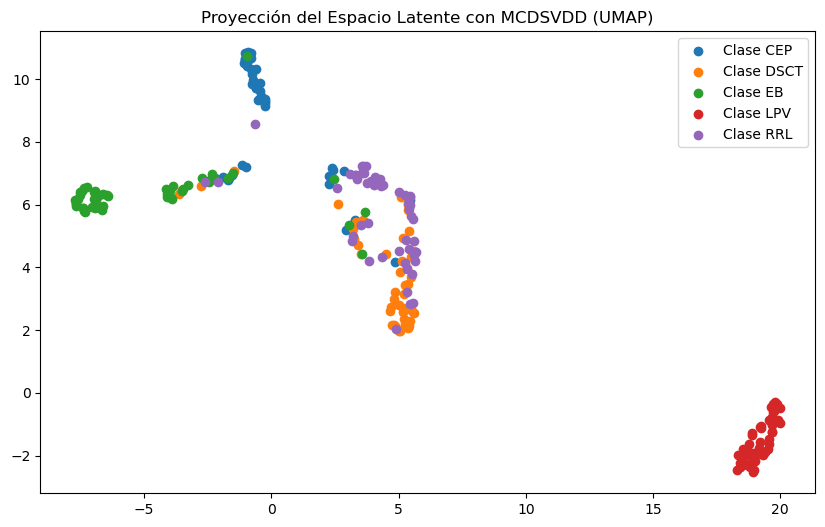

In [15]:
import umap

latents, labels = model_mcdsvdd.get_latent_space(test_loader_mcdsvdd)
reducer = umap.UMAP(n_components=2, random_state=42)
latent_2d = reducer.fit_transform(latents.numpy())

plt.figure(figsize=(10, 6))
for label in np.unique(labels):
    class_name = label_encoder.inverse_transform([label])[0]  # Obtener nombre de clase
    plt.scatter(latent_2d[labels == label, 0], latent_2d[labels == label, 1], label=f"Clase {class_name}")
plt.legend()
plt.title("Proyección del Espacio Latente con MCDSVDD (UMAP)")
plt.show()

In [16]:
model_mcdsvdd.set_anomaly_threshold(train_loader_mcdsvdd)

Umbral de Anomalía Establecido en: 0.0036144996993243694


In [17]:
# Clasificar el conjunto de prueba
test_data = torch.tensor(X_test, dtype=torch.float32).to(next(model_mcdsvdd.parameters()).device)
anomaly_predictions, anomaly_scores = model_mcdsvdd.classify_anomalies(test_data)

# Mostrar resultados
print("Predicciones de Anomalías:", anomaly_predictions)
print("Puntajes de Anomalías:", anomaly_scores)

Predicciones de Anomalías: tensor([False, False, False,  True,  True, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False, False,
         True, False, False,  True, False,  True, False, False, False, False,
         True, False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False,  True, False, False,
        False, False,  True, False,  True, False,  True, False, False, False,
        False, False, False, False, F

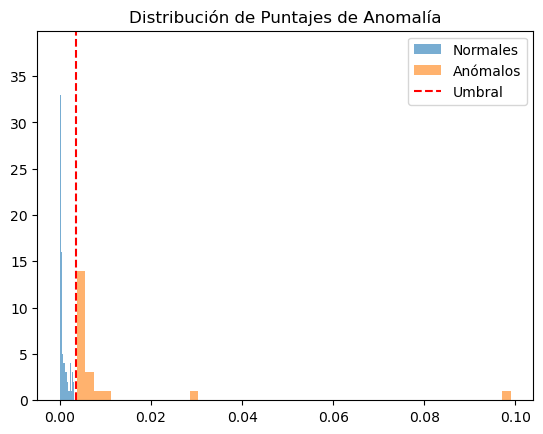

In [18]:
# Graficar histogramas de puntajes
plt.hist(anomaly_scores[~anomaly_predictions], bins=50, alpha=0.6, label="Normales")
plt.hist(anomaly_scores[anomaly_predictions], bins=50, alpha=0.6, label="Anómalos")
plt.axvline(model_mcdsvdd.anomaly_threshold, color='red', linestyle='dashed', label="Umbral")
plt.legend()
plt.title("Distribución de Puntajes de Anomalía")
plt.show()

In [25]:
# Crear un DataFrame con los datos de prueba, los puntajes y las predicciones
df_test_mc = pd.DataFrame({
    'oid': df_test['oid'],  # Sustituye con la columna que contiene los IDs únicos de tus objetos 
    'anomaly_score': anomaly_scores.cpu().numpy(),
    'is_anomaly': anomaly_predictions.cpu().numpy(),
    'class': y_test
})

# Filtrar solo las anomalías
anomalies = df_test_mc[df_test_mc['is_anomaly'] == True]

# Seleccionar las 5 anomalías con mayor puntaje
top_5_anomalies = anomalies.nlargest(5, 'anomaly_score')
print("Top 5 anomalías:")
print(top_5_anomalies)

Top 5 anomalías:
              oid  anomaly_score  is_anomaly class
23   ZTF18abcocjn       0.099018        True   CEP
38   ZTF18accxddh       0.029739        True   CEP
105  ZTF18abcgmqq       0.010718        True    EB
4    ZTF17aacpchm       0.007865        True   CEP
243  ZTF18abmeeiy       0.006992        True   RRL


In [ ]:
# Dataframe de los datos originales (X_test y IDs)
df_test_mc['anomaly_score'] = anomaly_scores.cpu().numpy()
df_test_mc['is_anomaly'] = anomaly_predictions.cpu().numpy()

# Mostrar solo las anomalías
anomalies = df_test_mc[df_test_mc['is_anomaly'] == True]
print("Objetos anómalos detectados:")
anomalies

Objetos anómalos detectados:


,oid,anomaly_score,is_anomaly,class
3,ZTF18acvvdbt,0.005382,True,CEP
4,ZTF17aacpchm,0.007865,True,CEP
16,ZTF18acejbpx,0.005185,True,CEP
20,ZTF18aavymrg,0.004233,True,CEP
23,ZTF18abcocjn,0.099018,True,CEP
25,ZTF18abevwjk,0.005744,True,CEP
30,ZTF19acvtyyy,0.003902,True,CEP
38,ZTF18accxddh,0.029739,True,CEP
47,ZTF18aawcdxs,0.004567,True,CEP
92,ZTF17aaaillb,0.005813,True,DSCT


## Curvas de luz

### Curva Anomalía: ZTF17aaarjuu

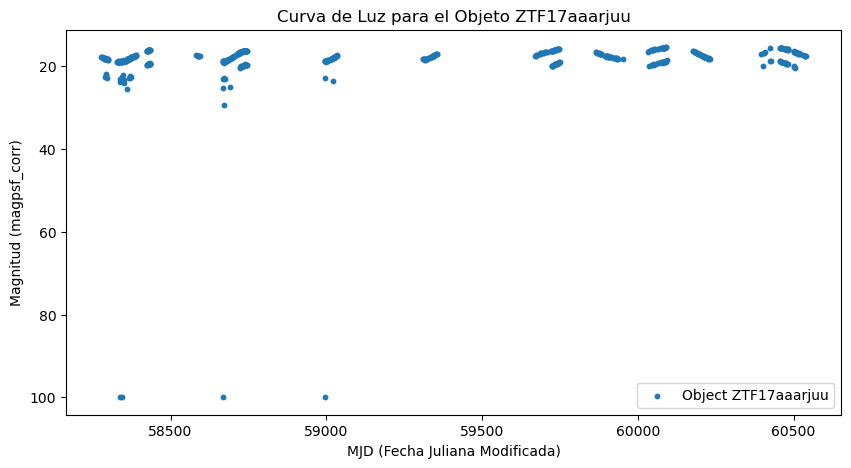

In [42]:
oid = "ZTF17aaarjuu"

# Filtrar el dataframe para el objeto actual
star_data = lcs[lcs['oid'] == oid]

# Columnas de tiempo y magnitud
time = star_data['mjd']
magnitude = star_data['magpsf_corr']  # 'magpsf': Sin correxión

# Curva de luz
plt.figure(figsize=(10, 5))
plt.scatter(time, magnitude, s=10, label=f"Object {oid}")
plt.xlabel('MJD (Fecha Juliana Modificada)')
plt.ylabel('Magnitud (magpsf_corr)')
plt.title(f'Curva de Luz para el Objeto {oid}')
plt.gca().invert_yaxis()  # Las magnitudes son inversas (más bajo es más brillante)
plt.legend()
plt.show()

C:\Users\nicos\AppData\Local\Temp\ipykernel_24260\2412192708.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
C:\Users\nicos\AppData\Local\Temp\ipykernel_24260\2412192708.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1


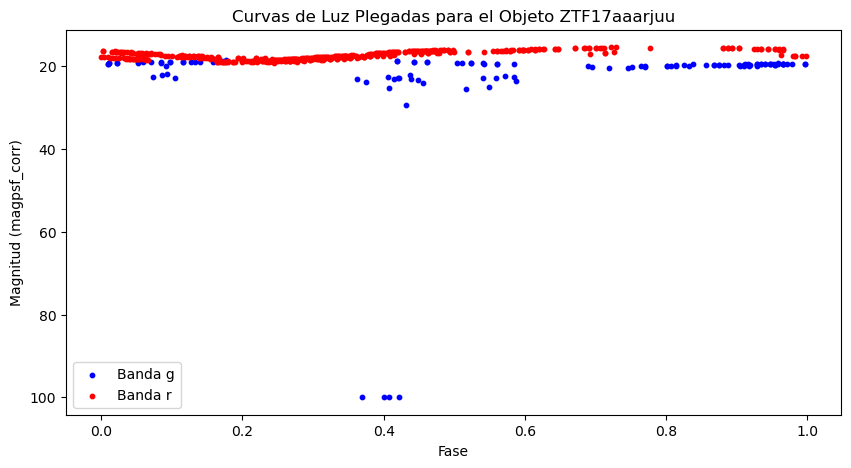

In [43]:
# Fusionar los DataFrames en base a la columna 'oid'
df_merged = pd.merge(lcs, feats[['oid', 'Multiband_period_g_r', 'Period_band_g', 'Period_band_r']], on='oid', how='left')

# Seleccionar el 'oid' del objeto que deseas analizar
oid_interes = 'ZTF17aaarjuu'

# Filtrar los datos para el 'oid' seleccionado
datos_estrella = df_merged[df_merged['oid'] == oid_interes]

# Verificar que hay datos disponibles para el 'oid' seleccionado
if not datos_estrella.empty:
    # Calcular la fase para cada observación
    mjd_0 = datos_estrella['mjd'].min()  # Época de referencia

    # Crear una columna de fase para cada banda
    datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
    datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1

    # Filtrar por banda utilizando 'fid' (1 para g, 2 para r)
    datos_g = datos_estrella[datos_estrella['fid'] == 1]
    datos_r = datos_estrella[datos_estrella['fid'] == 2]

    # Graficar las curvas de luz plegadas
    plt.figure(figsize=(10, 5))
    if not datos_g.empty:
        plt.scatter(datos_g['fase_g'], datos_g['magpsf_corr'], s=10, color='blue', label='Banda g')
    if not datos_r.empty:
        plt.scatter(datos_r['fase_r'], datos_r['magpsf_corr'], s=10, color='red', label='Banda r')
    plt.xlabel('Fase')
    plt.ylabel('Magnitud (magpsf_corr)')
    plt.title(f'Curvas de Luz Plegadas para el Objeto {oid_interes}')
    plt.gca().invert_yaxis()  # Las magnitudes son inversas
    plt.legend()
    plt.show()
else:
    print(f"No se encontraron datos para el objeto con oid {oid_interes}.")

### Curva Anomalia: ZTF18abcocjn

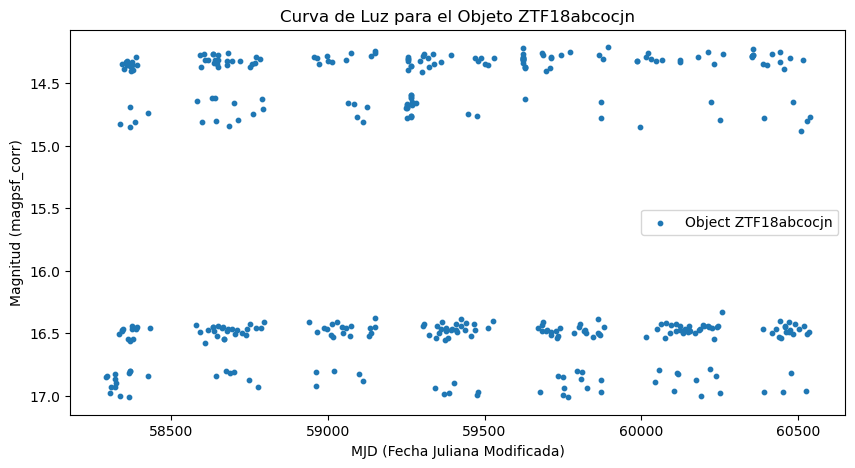

In [44]:
oid = "ZTF18abcocjn"

# Filtrar el dataframe para el objeto actual
star_data = lcs[lcs['oid'] == oid]

# Columnas de tiempo y magnitud
time = star_data['mjd']
magnitude = star_data['magpsf_corr']  # 'magpsf': Sin correxión

# Curva de luz
plt.figure(figsize=(10, 5))
plt.scatter(time, magnitude, s=10, label=f"Object {oid}")
plt.xlabel('MJD (Fecha Juliana Modificada)')
plt.ylabel('Magnitud (magpsf_corr)')
plt.title(f'Curva de Luz para el Objeto {oid}')
plt.gca().invert_yaxis()  # Las magnitudes son inversas (más bajo es más brillante)
plt.legend()
plt.show()

C:\Users\nicos\AppData\Local\Temp\ipykernel_24260\1987745840.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
C:\Users\nicos\AppData\Local\Temp\ipykernel_24260\1987745840.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1


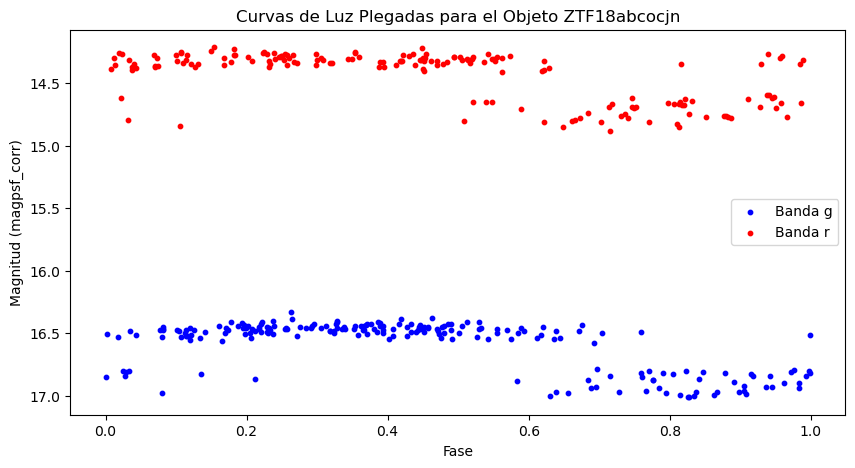

In [45]:
# Fusionar los DataFrames en base a la columna 'oid'
df_merged = pd.merge(lcs, feats[['oid', 'Multiband_period_g_r', 'Period_band_g', 'Period_band_r']], on='oid', how='left')

# Seleccionar el 'oid' del objeto que deseas analizar
oid_interes = 'ZTF18abcocjn'

# Filtrar los datos para el 'oid' seleccionado
datos_estrella = df_merged[df_merged['oid'] == oid_interes]

# Verificar que hay datos disponibles para el 'oid' seleccionado
if not datos_estrella.empty:
    # Calcular la fase para cada observación
    mjd_0 = datos_estrella['mjd'].min()  # Época de referencia

    # Crear una columna de fase para cada banda
    datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
    datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1

    # Filtrar por banda utilizando 'fid' (1 para g, 2 para r)
    datos_g = datos_estrella[datos_estrella['fid'] == 1]
    datos_r = datos_estrella[datos_estrella['fid'] == 2]

    # Graficar las curvas de luz plegadas
    plt.figure(figsize=(10, 5))
    if not datos_g.empty:
        plt.scatter(datos_g['fase_g'], datos_g['magpsf_corr'], s=10, color='blue', label='Banda g')
    if not datos_r.empty:
        plt.scatter(datos_r['fase_r'], datos_r['magpsf_corr'], s=10, color='red', label='Banda r')
    plt.xlabel('Fase')
    plt.ylabel('Magnitud (magpsf_corr)')
    plt.title(f'Curvas de Luz Plegadas para el Objeto {oid_interes}')
    plt.gca().invert_yaxis()  # Las magnitudes son inversas
    plt.legend()
    plt.show()
else:
    print(f"No se encontraron datos para el objeto con oid {oid_interes}.")